<a href="https://colab.research.google.com/github/GandaKen/myprojects/blob/master/Data_Visualization_Using_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Visualization Using t-SNE

In [0]:
#Imports 
import pandas as pd
import numpy as np

#Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#visualize the data characteristics 
import matplotlib.pyplot as plt

#Drawing Statistical plots
import seaborn as sns


In [0]:
#Download the data
dataframe = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv")

num_rows = dataframe.shape[0]

print(dataframe)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


       Unnamed: 0 user_name  ...  magnet_forearm_z  classe
0               1  carlitos  ...             476.0       A
1               2  carlitos  ...             473.0       A
2               3  carlitos  ...             469.0       A
3               4  carlitos  ...             469.0       A
4               5  carlitos  ...             473.0       A
5               6  carlitos  ...             478.0       A
6               7  carlitos  ...             470.0       A
7               8  carlitos  ...             474.0       A
8               9  carlitos  ...             476.0       A
9              10  carlitos  ...             473.0       A
10             11  carlitos  ...             465.0       A
11             12  carlitos  ...             478.0       A
12             13  carlitos  ...             472.0       A
13             14  carlitos  ...             478.0       A
14             15  carlitos  ...             472.0       A
15             16  carlitos  ...             471.0      

Clean The Data

In [0]:
#Check if there are missing values in the data
nans = dataframe.isnull()

#print(nans)

#Count the total number of missing values/null data
count_nan = dataframe.isnull().sum()

#print(count_nan)

#Count without nan values
count_wo_nan = count_nan[count_nan==0]

#print(count_wo_nan)

In [0]:
#remove the columns with missing elements
dataframe = dataframe[count_wo_nan.keys()]

#remove the first 7 columns which contain no discriminative information
dataframe = dataframe.ix[:,7:] #remove ix


# List of columns (the last column is the class label)
columns = dataframe.columns

print (columns)


Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forea

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


Get the Features and Scale appropriately 

In [0]:
#Get features (x) and scale the features and convert it to numpy array
x = dataframe.iloc[:,:-1].values

standard_scaler = StandardScaler()

x_std = standard_scaler.fit_transform(x)


#Get class labels y and then encode it into number  
# get class label data 

y = dataframe.iloc[:,-1].values


# encode the class label 
class_labels = np.unique(y)

label_encoder = LabelEncoder() 

y = label_encoder.fit_transform(y) 



Split the Data into training and test set

In [0]:
test_percentage = 0.1

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 10)

Distributed Stochastic Neighbor Embeding

In [0]:
# Dimensionality reduction
#t-distributed Stochastic Neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=10)

x_test_3d = tsne.fit_transform(x_test)





Scatter Plot for 5 sample Points

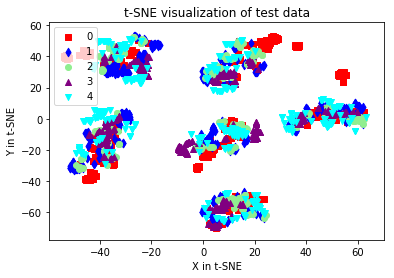

In [0]:
markers=('s', 'd', 'o', '^', 'v')

color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}

plt.figure()

for idx, cl in enumerate(np.unique(y_test)):
  plt.scatter(x=x_test_3d[y_test==cl,0], y=x_test_3d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
  
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()
  